In [1]:
# Initialization
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches

# These give the option to hide the code
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

# Newton's Method

A common problem that arises is solving problems of the form $f(x)=0$. If $f$ is a sufficiently simple function, we may be able to solve exactly for $x$, but in general it may not be possible or particularly easy. We'll try to apply some of our calculus knowledge to find an algorithm for approximating $x$.

## Table of Contents
- [Example 1](#Example1)
- [Example 2](#Example2)
- [Example 3](#Example3)

### Idea

Suppose we have some initial guess $x\approx x_0$. That is, we suppose the actual answer is somewhere near $x_0$. If we construct the linear approximation to $f(x)$ at $x=x_0$, then we get 

$$ y = f(x_0) + f'(x_0)\cdot(x-x_0) $$

For $x$ near $x_0$, $f(x)\approx y$, so solving $y=0$ should be close to solving $f(x)=0$. We can readily solve $y=0$ to get $$x = x_0 - \frac{f(x_0)}{f'(x_0)}.$$

Now we have a new guess, let's call it $x_1$. Ideally, $x_1$ will be an even better guess than $x_0$. We can use this same process to improve the estimate even further. We construct the linear approximation to $f(x)$ at $x=x_1$ and solve $y=0$. This would yield $$x_2 = x_1 - \frac{f(x_1)}{f'(x_1)}.$$

In general, given an approximation $x_n$, the next approximation can be found via: $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.$$

This is the core idea of Newton's method: by repeatedly using linear approximations, we can try to improve our approximation of $x$ so that $f(x)\approx0$.

### Picking the initial guess

Choosing the initial guess $x_0$ is a bit of an art. Sometimes you can use context of the problem or knowledge of the function to try and get a decent starting estimate, but other times it really is a guess. 

<a id='Example1'></a>

## Example 1

Consider solving for the root of $f(x) = 3x^3 - 3x + 1$. We'll start with the initial guess $x_0=-0.4$. 

In [2]:
# Function definition
def f(x):
    return 3*x**3 -3*x +1
def f_prime(x):
    return 9*x**2 -3

# Bounds of plot
xL = -1.25;
xR = 1.25;

# create the curve
N = 5000;
x = np.linspace(xL,xR,N);
y = f(x);

In [3]:
## initial guess
x0 = -0.4;
y0 = f(x0);
S0 = f_prime(x0);
L0 = y0 + S0*(x-x0);
r0 = x0-(y0/S0);

# use the new root as a new guess
x1 = r0;
y1 = f(x1);
S1 = f_prime(x1);
L1 = y1 + S1*(x-x1);
r1 = x1-(y1/S1);

# use the new root as a new guess
x2 = r1;
y2 = f(x2);
S2 = f_prime(x2);
L2 = y2 + S2*(x-x2);
r2 = x2-(y2/S2);

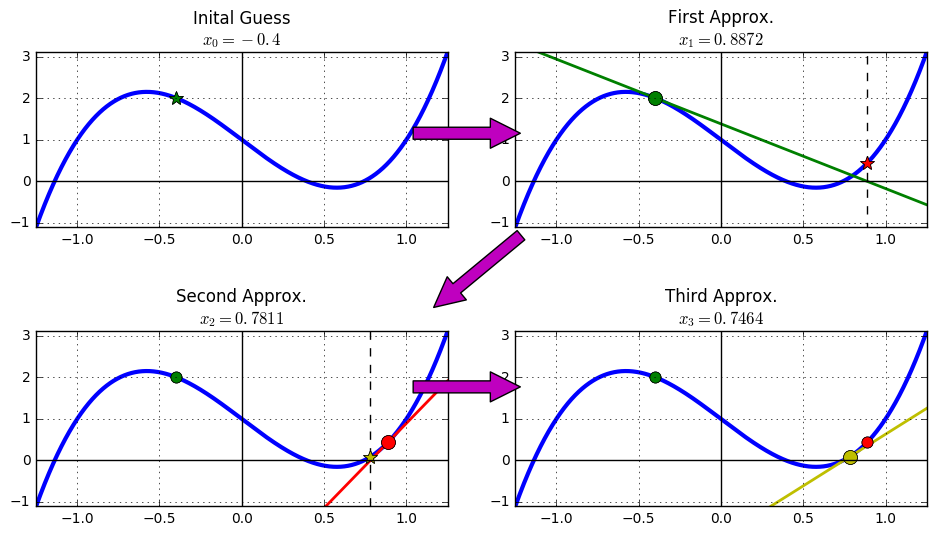

In [4]:
##
## Now some plotting
##

fig = plt.figure(figsize=(10,6))

ax1 = plt.subplot(2,2,1)
plt.plot(x,y, linewidth=3)
plt.xlim((xL,xR));
plt.ylim((f(xL),f(xR)));
plt.axhline(0, color='black');
plt.axvline(0, color='black');
plt.plot([x0,x0],[y0,y0],'g*',markersize=10);
plt.title('Inital Guess\n$x_0 = {0:.4g}$'.format(x0))
plt.grid('on');

# plot it
ax2 = plt.subplot(2,2,2)
plt.plot(x,y, linewidth=3)
plt.plot(x, L0, 'g', linewidth=2);
plt.plot([x0,x0],[y0,y0],'go',markersize=10);
plt.plot([x1,x1],ax2.get_ylim(),'--k');
plt.plot([x1,x1],[y1,y1],'r*',markersize=10);
plt.xlim((xL,xR));
plt.ylim((f(xL),f(xR)));
plt.title('First Approx.\n$x_1 = {0:.4g}$'.format(r0))
plt.axhline(0, color='black');
plt.axvline(0, color='black');
plt.grid('on');

# plot it
ax3 = plt.subplot(2,2,3)
plt.plot(x,y, linewidth=3)
plt.plot(x, L1, 'r', linewidth=2);
plt.plot([x0,x0],[y0,y0],'go',markersize=8);
plt.plot([x1,x1],[y1,y1],'ro',markersize=10);
plt.plot([x2,x2],ax2.get_ylim(),'--k');
plt.plot([x2,x2],[y2,y2],'y*',markersize=10);
plt.xlim((xL,xR));
plt.ylim((f(xL),f(xR)));
plt.title('Second Approx.\n$x_2 = {0:.4g}$'.format(r1))
plt.axhline(0, color='black');
plt.axvline(0, color='black');
plt.grid('on');

# plot it
ax4 = plt.subplot(2,2,4)
plt.plot(x,y, linewidth=3)
plt.plot(x, L2, 'y', linewidth=2);
plt.plot([x0,x0],[y0,y0],'go',markersize=8);
plt.plot([x1,x1],[y1,y1],'ro',markersize=8);
plt.plot([x2,x2],[y2,y2],'yo',markersize=10);
plt.xlim((xL,xR));
plt.ylim((f(xL),f(xR)));
plt.title('Third Approx.\n$x_3 = {0:.4g}$'.format(r2))
plt.axhline(0, color='black');
plt.axvline(0, color='black');
plt.grid('on');


# Create the arrow
ax0tr = ax1.transData 
ax1tr = ax2.transData 
ax2tr = ax3.transData
ax3tr = ax4.transData
figtr = fig.transFigure.inverted() 

ptA1 = figtr.transform(ax0tr.transform((1., 1.)))
ptA2 = figtr.transform(ax1tr.transform((-1.2, 1.)))

ptB1 = figtr.transform(ax1tr.transform((-1.2, -1.)))
ptB2 = figtr.transform(ax2tr.transform((1.15, 2.55)))

ptC1 = figtr.transform(ax2tr.transform((1., 1.)))
ptC2 = figtr.transform(ax3tr.transform((-1.2, 1.)))

arrow12 = matplotlib.patches.FancyArrowPatch(
    ptA1, ptA2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)
arrow23 = matplotlib.patches.FancyArrowPatch(
    ptB1, ptB2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)
arrow34 = matplotlib.patches.FancyArrowPatch(
    ptC1, ptC2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)

fig.patches.append(arrow12)
fig.patches.append(arrow23)
fig.patches.append(arrow34)

plt.tight_layout(pad=3)

### Use a compter

Using a computer, we can very easily use many iterations without the hassle of dealing with the unpleasant numbers. For each iteration, we'll keep track of $x$, the estimate of the solution to $f(x)=0$, as well as $f(x)$, so that we can see how close $f(x)$ is to being zero.

In [5]:
x0 = -0.4;
x_n = x0;
x_new = x_n;
n = 0
print("Guess {0:02d}: x = {1:+0.8f}, f(x) = {2:+0.8f}".format(n,x_n,f(x_n)))
for n in range(1,10):
    x_new = x_n - f(x_n)/f_prime(x_n);
    x_n = x_new;
    print("Guess {0:02d}: x = {1:+0.8f}, f(x) = {2:+0.8f}".format(n,x_n,f(x_n)))

Guess 00: x = -0.40000000, f(x) = +2.00800000
Guess 01: x = +0.88717949, f(x) = +0.43332504
Guess 02: x = +0.78107086, f(x) = +0.08631507
Guess 03: x = +0.74641515, f(x) = +0.00831786
Guess 04: x = +0.74228558, f(x) = +0.00011435
Guess 05: x = +0.74222721, f(x) = +0.00000002
Guess 06: x = +0.74222720, f(x) = +0.00000000
Guess 07: x = +0.74222720, f(x) = +0.00000000
Guess 08: x = +0.74222720, f(x) = +0.00000000
Guess 09: x = +0.74222720, f(x) = +0.00000000


<a id='Example2'></a>

## Example 2

Consider solving for the root of $f(x) = \ln(x) - 1$. Since we know that the solution is $x=e$, we are essentially trying to approximate $e$. We'll start with the initial guess $x_0=1$. 

In [6]:
# Function definition
def f(x):
    return np.log(x)-1.
def f_prime(x):
    return 1./x

## Bounds of plot
xL = 0.5;
xR = 6.;

# create the curve
N = 5000;
x = np.linspace(xL,xR,N);
y = f(x);

In [7]:
# initial guess
x0 = 1.;   
y0 = f(x0);
S0 = f_prime(x0);
L0 = y0 + S0*(x-x0);
r0 = x0-(y0/S0);

# use the new root as a new guess
x1 = r0;
y1 = f(x1);
S1 = f_prime(x1);
L1 = y1 + S1*(x-x1);
r1 = x1-(y1/S1);

# use the new root as a new guess
x2 = r1;
y2 = f(x2);
S2 = f_prime(x2);
L2 = y2 + S2*(x-x2);
r2 = x2-(y2/S2);

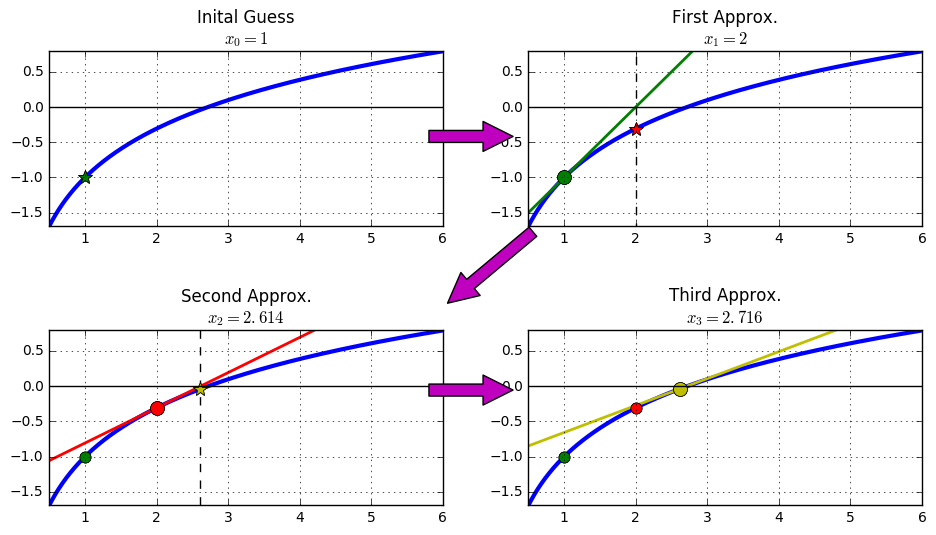

In [8]:
##
## Now some plotting
##

fig = plt.figure(figsize=(10,6))

ax1 = plt.subplot(2,2,1)
plt.plot(x,y, linewidth=3)
plt.xlim((xL,xR));
plt.ylim((f(xL),f(xR)));
plt.axhline(0, color='black');
plt.axvline(0, color='black');
plt.plot([x0,x0],[y0,y0],'g*',markersize=10);
plt.title('Inital Guess\n$x_0 = {0:.4g}$'.format(x0))
plt.grid('on');

# plot it
ax2 = plt.subplot(2,2,2)
plt.plot(x,y, linewidth=3)
plt.plot(x, L0, 'g', linewidth=2);
plt.plot([x0,x0],[y0,y0],'go',markersize=10);
plt.plot([x1,x1],ax2.get_ylim(),'--k');
plt.plot([x1,x1],[y1,y1],'r*',markersize=10);
plt.xlim((xL,xR));
plt.ylim((f(xL),f(xR)));
plt.title('First Approx.\n$x_1 = {0:.4g}$'.format(r0))
plt.axhline(0, color='black');
plt.axvline(0, color='black');
plt.grid('on');

# plot it
ax3 = plt.subplot(2,2,3)
plt.plot(x,y, linewidth=3)
plt.plot(x, L1, 'r', linewidth=2);
plt.plot([x0,x0],[y0,y0],'go',markersize=8);
plt.plot([x1,x1],[y1,y1],'ro',markersize=10);
plt.plot([x2,x2],ax2.get_ylim(),'--k');
plt.plot([x2,x2],[y2,y2],'y*',markersize=10);
plt.xlim((xL,xR));
plt.ylim((f(xL),f(xR)));
plt.title('Second Approx.\n$x_2 = {0:.4g}$'.format(r1))
plt.axhline(0, color='black');
plt.axvline(0, color='black');
plt.grid('on');

# plot it
ax4 = plt.subplot(2,2,4)
plt.plot(x,y, linewidth=3)
plt.plot(x, L2, 'y', linewidth=2);
plt.plot([x0,x0],[y0,y0],'go',markersize=8);
plt.plot([x1,x1],[y1,y1],'ro',markersize=8);
plt.plot([x2,x2],[y2,y2],'yo',markersize=10);
plt.xlim((xL,xR));
plt.ylim((f(xL),f(xR)));
plt.title('Third Approx.\n$x_3 = {0:.4g}$'.format(r2))
plt.axhline(0, color='black');
plt.axvline(0, color='black');
plt.grid('on');


# Create the arrow
ax0tr = ax1.transData 
ax1tr = ax2.transData 
ax2tr = ax3.transData
ax3tr = ax4.transData
figtr = fig.transFigure.inverted() 

ptA1 = figtr.transform(ax0tr.transform((5.7, -0.5)))
ptA2 = figtr.transform(ax1tr.transform((0.5, -0.5)))

ptB1 = figtr.transform(ax1tr.transform((0.8, -1.6)))
ptB2 = figtr.transform(ax2tr.transform((6., 0.5)))

ptC1 = figtr.transform(ax2tr.transform((5.7, -0.5)))
ptC2 = figtr.transform(ax3tr.transform((0.5, -0.5)))

arrow12 = matplotlib.patches.FancyArrowPatch(
    ptA1, ptA2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)
arrow23 = matplotlib.patches.FancyArrowPatch(
    ptB1, ptB2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)
arrow34 = matplotlib.patches.FancyArrowPatch(
    ptC1, ptC2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)

fig.patches.append(arrow12)
fig.patches.append(arrow23)
fig.patches.append(arrow34)

plt.tight_layout(pad=3)

### Use a compter

Using a computer, we can very easily use many iterations without the hassle of dealing with the unpleasant numbers. For each iteration, we'll keep track of $x$, the estimate of the solution to $f(x)=0$, as well as $f(x)$, so that we can see how close $f(x)$ is to being zero.

In [9]:
x0 = 1.;
x_n = x0;
x_new = x_n;
n = 0
print("Guess {0:02d}: x = {1:+0.8f}, f(x) = {2:+0.8f}".format(n,x_n,f(x_n)))
for n in range(1,10):
    x_new = x_n - f(x_n)/f_prime(x_n);
    x_n = x_new;
    print("Guess {0:02d}: x = {1:+0.8f}, f(x) = {2:+0.8f}".format(n,x_n,f(x_n)))

Guess 00: x = +1.00000000, f(x) = -1.00000000
Guess 01: x = +2.00000000, f(x) = -0.30685282
Guess 02: x = +2.61370564, f(x) = -0.03923100
Guess 03: x = +2.71624393, f(x) = -0.00074998
Guess 04: x = +2.71828106, f(x) = -0.00000028
Guess 05: x = +2.71828183, f(x) = -0.00000000
Guess 06: x = +2.71828183, f(x) = +0.00000000
Guess 07: x = +2.71828183, f(x) = +0.00000000
Guess 08: x = +2.71828183, f(x) = +0.00000000
Guess 09: x = +2.71828183, f(x) = +0.00000000


<a id='Example3'></a>

## Example 3

Consider solving for the root of $f(x) = \cos(x) - x$. We'll start with the initial guess $x_0=2.5$. 

In [10]:
# Function definition
def f(x):
    return np.cos(x) - x
def f_prime(x):
    return -np.sin(x) - 1.

# Bounds of plot
xL = -1.;
xR = 3.;

# create the curve
N = 5000;
x = np.linspace(xL,xR,N);
y = f(x);

In [11]:
# initial guess
x0 = 2.5;
y0 = f(x0);
S0 = f_prime(x0);
L0 = y0 + S0*(x-x0);
r0 = x0-(y0/S0);

# use the new root as a new guess
x1 = r0;
y1 = f(x1);
S1 = f_prime(x1);
L1 = y1 + S1*(x-x1);
r1 = x1-(y1/S1);

# use the new root as a new guess
x2 = r1;
y2 = f(x2);
S2 = f_prime(x2);
L2 = y2 + S2*(x-x2);
r2 = x2-(y2/S2);

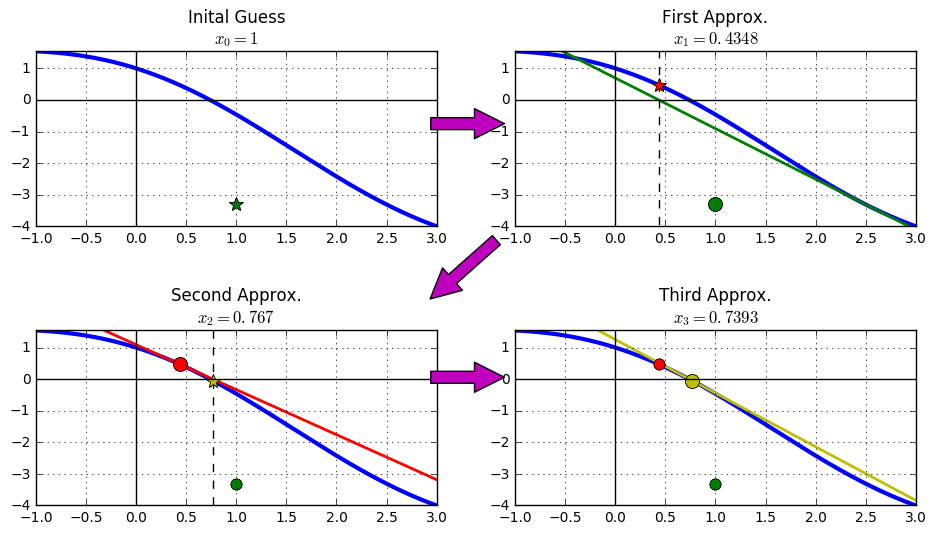

In [17]:
##
## Now some plotting
##

fig = plt.figure(figsize=(10,6))

ax1 = plt.subplot(2,2,1)
plt.plot(x,y, linewidth=3)
plt.xlim((xL,xR));
plt.ylim((f(xR),f(xL)));
plt.axhline(0, color='black');
plt.axvline(0, color='black');
plt.plot([x0,x0],[y0,y0],'g*',markersize=10);
plt.title('Inital Guess\n$x_0 = {0:.4g}$'.format(x0))
plt.grid('on');

# plot it
ax2 = plt.subplot(2,2,2)
plt.plot(x,y, linewidth=3)
plt.plot(x, L0, 'g', linewidth=2);
plt.plot([x0,x0],[y0,y0],'go',markersize=10);
plt.plot([x1,x1],ax2.get_ylim(),'--k');
plt.plot([x1,x1],[y1,y1],'r*',markersize=10);
plt.xlim((xL,xR));
plt.ylim((f(xR),f(xL)));
plt.title('First Approx.\n$x_1 = {0:.4g}$'.format(r0))
plt.axhline(0, color='black');
plt.axvline(0, color='black');
plt.grid('on');

# plot it
ax3 = plt.subplot(2,2,3)
plt.plot(x,y, linewidth=3)
plt.plot(x, L1, 'r', linewidth=2);
plt.plot([x0,x0],[y0,y0],'go',markersize=8);
plt.plot([x1,x1],[y1,y1],'ro',markersize=10);
plt.plot([x2,x2],ax2.get_ylim(),'--k');
plt.plot([x2,x2],[y2,y2],'y*',markersize=10);
plt.xlim((xL,xR));
plt.ylim((f(xR),f(xL)));
plt.title('Second Approx.\n$x_2 = {0:.4g}$'.format(r1))
plt.axhline(0, color='black');
plt.axvline(0, color='black');
plt.grid('on');

# plot it
ax4 = plt.subplot(2,2,4)
plt.plot(x,y, linewidth=3)
plt.plot(x, L2, 'y', linewidth=2);
plt.plot([x0,x0],[y0,y0],'go',markersize=8);
plt.plot([x1,x1],[y1,y1],'ro',markersize=8);
plt.plot([x2,x2],[y2,y2],'yo',markersize=10);
plt.xlim((xL,xR));
plt.ylim((f(xR),f(xL)));
plt.title('Third Approx.\n$x_3 = {0:.4g}$'.format(r2))
plt.axhline(0, color='black');
plt.axvline(0, color='black');
plt.grid('on');


# Create the arrow
ax0tr = ax1.transData 
ax1tr = ax2.transData 
ax2tr = ax3.transData
ax3tr = ax4.transData
figtr = fig.transFigure.inverted() 

ptA1 = figtr.transform(ax0tr.transform((2.8, -1.)))
ptA2 = figtr.transform(ax1tr.transform((-1.1, -1.)))

ptB1 = figtr.transform(ax1tr.transform((-1.2, -4)))
ptB2 = figtr.transform(ax2tr.transform((2.8, 1.)))

ptC1 = figtr.transform(ax2tr.transform((2.8, -1.)))
ptC2 = figtr.transform(ax3tr.transform((-1.1, -1.)))

arrow12 = matplotlib.patches.FancyArrowPatch(
    ptA1, ptA2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)
arrow23 = matplotlib.patches.FancyArrowPatch(
    ptB1, ptB2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)
arrow34 = matplotlib.patches.FancyArrowPatch(
    ptC1, ptC2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)

fig.patches.append(arrow12)
fig.patches.append(arrow23)
fig.patches.append(arrow34)

plt.tight_layout(pad=3)

### Use a compter

Using a computer, we can very easily use many iterations without the hassle of dealing with the unpleasant numbers. For each iteration, we'll keep track of $x$, the estimate of the solution to $f(x)=0$, as well as $f(x)$, so that we can see how close $f(x)$ is to being zero.

In [13]:
x0 = 1.;
x_n = x0;
x_new = x_n;
n = 0
print("Guess {0:02d}: x = {1:+0.8f}, f(x) = {2:+.8f}".format(n,x_n,f(x_n)))
for n in range(1,10):
    x_new = x_n - f(x_n)/f_prime(x_n);
    x_n = x_new;
    print("Guess {0:02d}: x = {1:+0.8f}, f(x) = {2:+.8f}".format(n,x_n,f(x_n)))

Guess 00: x = +1.00000000, f(x) = -0.45969769
Guess 01: x = +0.75036387, f(x) = -0.01892307
Guess 02: x = +0.73911289, f(x) = -0.00004646
Guess 03: x = +0.73908513, f(x) = -0.00000000
Guess 04: x = +0.73908513, f(x) = +0.00000000
Guess 05: x = +0.73908513, f(x) = +0.00000000
Guess 06: x = +0.73908513, f(x) = +0.00000000
Guess 07: x = +0.73908513, f(x) = +0.00000000
Guess 08: x = +0.73908513, f(x) = +0.00000000
Guess 09: x = +0.73908513, f(x) = +0.00000000
